In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df0 = pd.read_csv("df_city_bikes.csv").head(150)
df1 = pd.read_csv("pain.csv")
df1 = df1.iloc[:, 1:]

In [4]:
numbers = ['0','1','2','3','4','5','6','7','8','9']

In [5]:
df1

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,"['Castell Bites & Steaks', 22761.122603597174,...","['De Pimpernel', 37299.80696901307, 5.0]","['Jamón Jamón', 29543.805912016735, 5.0]","['Jasmin', 37175.54001105355, 5.0]","['Wilde Kroketten', 27938.845437326432, 5.0]","['Turquoise Meating', 29229.29638876733, 5.0]","['H.Burger', 30932.684478298255, 5.0]","['Cereal & Chill', 33300.31211534765, 5.0]","['Cafe Keppler', 30086.654495964758, 5.0]","['The Beef Chief', 32166.5967715451, 5.0]",...,"['Café Nieuw Amsterdam', 30414.634718342084, 4.9]","['Semai Restaurant & Lounge', 29523.9818082692...","['Soup en Zo', 32926.849880401125, 4.9]","['Spectrum', 32143.36981925043, 4.9]","['Foodbar 63 Graden', 32501.649595099883, 4.9]","['De Pizzabakkers', 30798.778513942285, 4.9]","['Ramen-Kingdom', 30994.537572542347, 4.9]","['Mama Dough', 33444.33187752978, 4.9]","['Super Lyan', 30787.29673033436, 4.9]","[""Cafe 't Molentje"", 31154.634122492254, 4.9]"
1,"['Castell Bites & Steaks', 8228.333125660743, ...","['De Pimpernel', 19298.96262156026, 5.0]","['Cafe de Volder', 58377.864318440545, 5.0]","['Jamón Jamón', 20179.46450072185, 5.0]","['Restaurant La Tasca', 58340.76028907424, 5.0]","['Jasmin', 19351.312020786452, 5.0]","['Pâtisserie Philippe Galerne', 56820.15593944...","['Da Braccini', 56897.72719959345, 5.0]","['Wilde Kroketten', 3733.3987577543353, 5.0]","['Turquoise Meating', 1291.7005401658812, 5.0]",...,"['Foeders', 5461.284005436839, 5.0]","['Men Impossible', 4938.107798096114, 5.0]","['101 Gowrie', 5527.88652444203, 5.0]","['Chok Dee Thai', 3865.2199804948013, 5.0]","['Japanese Don Dining Kounosuke', 38144.619791...","['Tom Yum Kung', 3765.3830542628816, 5.0]","['Strandclub Witsand', 37661.05338253752, 5.0]","['Sandwichshop Amsterdam | Langebrugsteeg', 44...","[""'t Plein"", 841.8199267933572, 5.0]","['Gallery3', 5585.32109172336, 4.9]"
2,"['Rhodos', 63718.31693782013, 5.0]","['Bistro de Buik van Parijs', 36074.2526287629...","['La Nuova Gondola', 51949.70250510153, 5.0]","['Klein Parijs', 71823.9027097006, 5.0]","['Pannenkoekhoes De Stroper', 56920.1001706121...","['Lockes DöPiz', 69516.04338089153, 4.8]","['Mamta', 71855.38831776466, 4.8]","['Aroy-D', 63620.87210499633, 4.8]","['Il Lago', 50850.85048153204, 4.8]","[""'t Bölke"", 63428.001153014025, 4.8]",...,"[""O'Ceallaigh"", 54164.60617634141, 5.0]","['Fusion Wok', 64027.66514848165, 5.0]","['Merry Gold', 45025.957246040314, 4.8]","['Dönerix', 57452.71672162575, 5.0]","['Pizzeria La Cantina', 57602.35076274685, 5.0]","['Lo Stivale', 54883.4306733131, 4.8]","['Houdt van eten', 53922.855960782996, 4.8]","['Uit De Buurt', 52347.653266321264, 5.0]","['Broodbode', 65091.04179014904, 5.0]","['Roezemoes', 54054.04146078852, 4.5]"
3,"['Castell Bites & Steaks', 49527.6613137236, 5.0]","['De Pimpernel', 32020.45915621549, 5.0]","['Cafe de Volder', 9092.50711880006, 5.0]","['Jamón Jamón', 38306.928338448975, 5.0]","['Restaurant La Tasca', 9052.105465962402, 5.0]","['Jasmin', 32066.920344018192, 5.0]","[""Latte's & Literature"", 55200.457119159175, 5.0]","['Pâtisserie Philippe Galerne', 14501.66201907...","['Da Braccini', 13675.97056450931, 5.0]","['Wilde Kroketten', 47600.11226991251, 5.0]",...,"['Foeders', 44886.78857608167, 5.0]","['Men Impossible', 45103.49048478717, 5.0]","['101 Gowrie', 44708.42068677634, 5.0]","['Chok Dee Thai', 46280.39960707298, 5.0]","['Japanese Don Dining Kounosuke', 44323.146027...","['Tom Yum Kung', 46743.66748273759, 5.0]","['Strandclub Witsand', 22739.293493320507, 5.0]","['Sandwichshop Amsterdam | Langebrugsteeg', 45...","[""'t Plein"", 50048.124777711884, 5.0]","['Gallery3', 44470.60412865922, 4.9]"
4,"['Poorte Jäntje', 56966.99333478179, 5.0]","['Castell Bites & Steaks', 67862.36859219357, ...","['De Pimpernel', 66062.8639106754, 5.0]","['Jasmin', 66267.337247772, 5.0]","[""Latte's & Literature"", 71816.70724572397, 5.0]","['De Duivelsberg', 35023.49661807419, 5.0]","['Wilde Kroketten', 62408.61950386859, 5.0]","['Turquoise Meating', 60271.650919

In [6]:
df1.fillna('', inplace = True)
df1.shape

(150, 50)

In [7]:
df1.keys()


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49'],
      dtype='object')

In [8]:
def extractNum(text, target_index):
    comma_count = 0
    in_string = False
    num_chars = []
    search_char = None  # Track which quote type is active

    for char in text:
        if char in {"'", '"'}:
            if in_string and char == search_char:
                in_string = False  
                search_char = None
            elif not in_string:
                in_string = True 
                search_char = char

        if comma_count == target_index and not in_string:
            if char.isdigit() or char == '.':
                num_chars.append(char)
            elif char == ',':
                break  
        if char == ',' and not in_string:
            comma_count += 1

    return float(''.join(num_chars)) if num_chars else 0.0

In [9]:
print(extractNum(df1.loc[0]['0'],1))
print(extractNum(df1.loc[0]['0'],2))
type(df1.loc[0]['0'])

22761.122603597174
5.0


str

In [10]:
len(df1)

150

In [11]:
avgs = []
for x in range(len(df1)):
    total = 0
    count = 0
    for item in df1.loc[x]:
        if item != '':
            total += extractNum(item,1)
            count += 1
    avgs.append(total/count)


avgr = []
for x in range(len(df1)):
    total = 0
    count = 0
    for item in df1.loc[x]:
        if item != '':
            total += extractNum(item,2)
            count += 1
    avgr.append(total/count)
avgr

[4.9780000000000015,
 4.998,
 4.8020000000000005,
 4.998,
 4.99,
 4.780000000000002,
 4.998,
 4.9040000000000035,
 5.0,
 4.960000000000003,
 4.882000000000007,
 4.795999999999996,
 5.0,
 5.0,
 4.994000000000001,
 4.998,
 4.894000000000002,
 5.0,
 4.998,
 5.0,
 4.815999999999997,
 4.884000000000004,
 4.763999999999996,
 4.986000000000001,
 4.996,
 4.890000000000005,
 4.9780000000000015,
 5.0,
 4.994000000000001,
 4.787999999999996,
 4.767999999999997,
 5.0,
 4.898000000000002,
 5.0,
 4.918000000000001,
 4.872000000000007,
 5.0,
 4.781999999999997,
 4.998,
 4.998,
 4.779999999999996,
 4.896000000000003,
 4.787999999999996,
 4.994000000000001,
 4.8680000000000065,
 4.930000000000004,
 4.994000000000001,
 4.9220000000000015,
 4.795999999999999,
 4.836,
 5.0,
 4.996,
 5.0,
 4.738000000000002,
 5.0,
 4.998,
 4.994000000000001,
 4.826000000000001,
 4.980000000000001,
 4.980000000000001,
 4.930000000000004,
 4.996,
 4.998,
 4.763999999999996,
 4.930000000000004,
 4.966000000000002,
 4.81,
 4.9

In [12]:
df0 = df0[['Free Bikes']]
df0['Ratings'] = avgr

In [13]:
df0['avg_distance'] = avgs

In [14]:
dfFinal = df0
dfFinal.sort_values(by='avg_distance')

,Free Bikes,Ratings,avg_distance
93,183,4.998,15060.068876
77,977,4.998,15081.077514
115,209,4.998,15148.756034
62,0,4.998,15196.896417
92,153,4.998,15223.011901
...,...,...,...
43,27,4.994,60712.595150
9,14,4.960,61164.503873
129,7,4.926,62111.418388
75,36,4.930,63797.969381


In [15]:
dfFinal.to_csv('csvFinal.csv')

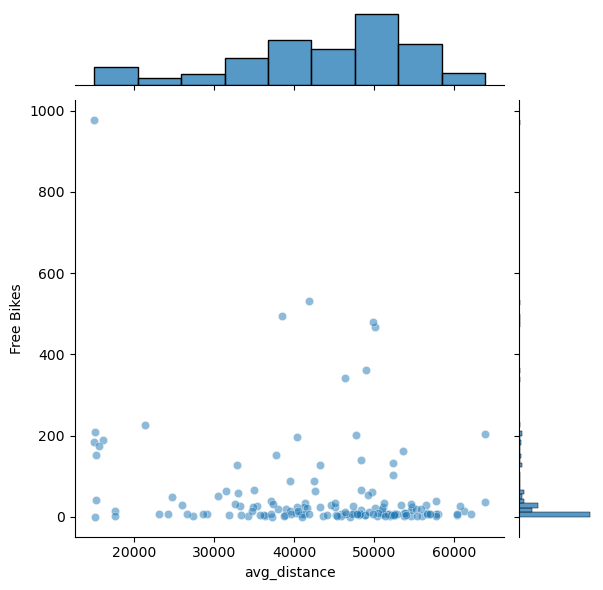

In [16]:
sns.jointplot(x="avg_distance", y="Free Bikes", data=dfFinal, alpha=0.5)

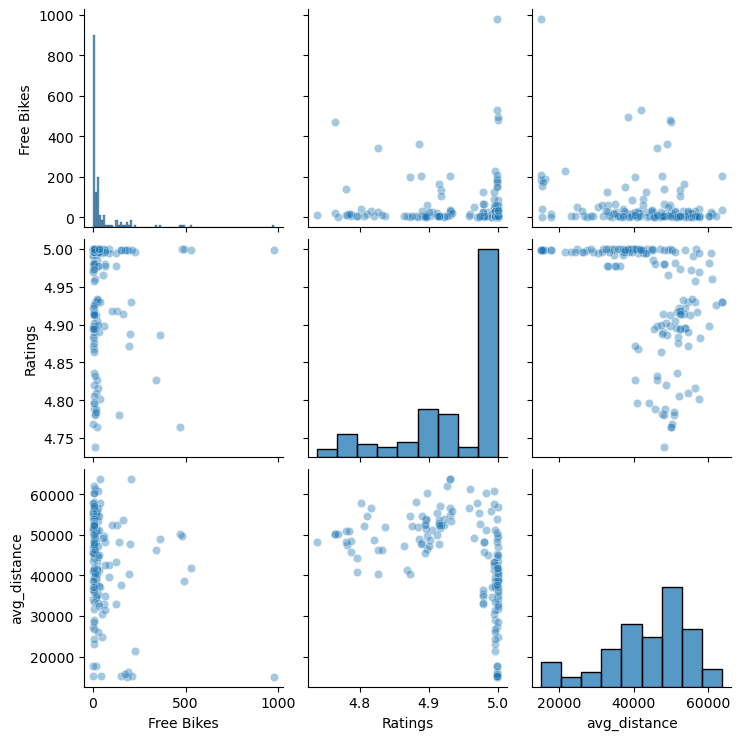

In [17]:
sns.pairplot(dfFinal, kind='scatter', plot_kws={'alpha': 0.4})

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = dfFinal[['avg_distance','Free Bikes']]
Y = dfFinal['Ratings']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train)

     avg_distance  Free Bikes
81   37201.385942           0
133  48263.225053           8
137  47259.786247           8
75   63797.969381          36
109  51762.272283           6
..            ...         ...
71   27408.900487           3
106  52276.334549           4
14   43252.131302          25
92   15223.011901         153
102  15301.346556          42

[105 rows x 2 columns]


In [21]:
Y_train

81     4.992
133    4.998
137    4.864
75     4.930
109    4.916
       ...  
71     4.998
106    4.806
14     4.994
92     4.998
102    4.998
Name: Ratings, Length: 105, dtype: float64

In [22]:
Y_test

73     4.982
18     4.998
118    4.998
78     4.994
76     5.000
31     5.000
64     4.930
141    5.000
68     4.998
82     4.902
110    4.996
12     5.000
36     5.000
9      4.960
19     5.000
56     4.994
104    5.000
69     4.912
55     4.998
132    4.894
29     4.788
127    4.978
26     4.978
128    5.000
131    4.996
145    4.894
108    4.998
143    5.000
45     4.930
30     4.768
22     4.764
15     4.998
65     4.966
11     4.796
42     4.788
146    4.832
51     4.996
27     5.000
4      4.990
32     4.898
142    5.000
85     4.898
86     4.896
16     4.894
10     4.882
Name: Ratings, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,Y_train)

LinearRegression()

In [26]:
lm.coef_

array([-3.12438957e-06, -5.91331818e-05])

In [27]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coef'])
print(cdf)

                  Coef
avg_distance -0.000003
Free Bikes   -0.000059


In [28]:
predictions = lm.predict(X_test)

In [29]:
predictions

array([4.8901891 , 4.95916264, 5.01963921, 4.89822206, 4.968583  ,
       4.99841882, 4.90150665, 4.97522613, 4.93721864, 4.92602467,
       5.00596377, 4.94231849, 4.95711968, 4.8868772 , 4.97226147,
       4.98050072, 4.89478239, 4.90503509, 4.93773611, 4.93675272,
       4.93517296, 4.97351453, 4.9668488 , 4.98912282, 4.91686167,
       4.91451144, 4.91015103, 4.9358816 , 4.90632953, 4.92145229,
       4.92102513, 5.01727249, 4.92178278, 4.95087891, 4.92667953,
       4.93330791, 4.96063019, 4.95460179, 4.90385308, 4.91978331,
       4.94766583, 4.93329053, 4.91012361, 4.91435681, 4.89725786])

<Axes: ylabel='Ratings'>

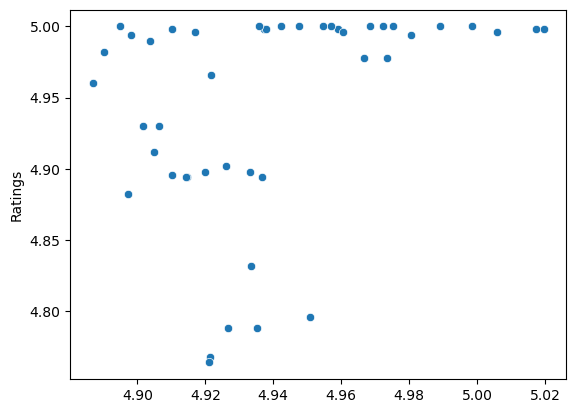

In [30]:
sns.scatterplot(x = predictions, y = Y_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [32]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  0.0534020286222838
Mean Squared Error:  0.004787918071319135
Root Mean Squared Error:  0.06919478355569252


In [67]:
from sklearn.metrics import r2_score

In [69]:
r2 = lm.score(X_test,Y_test)

In [71]:
r2

0.0995326098517959